<a href="https://colab.research.google.com/github/Huynh-Truong-75/Project-CNN/blob/main/Rice_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**https://drive.google.com/drive/folders/1wLN5sffUIEWjUNg-h2ZtuiIi5Xf9ShD7?usp=share_link**

In [ ]:
import matplotlib.pyplot            as plt
from matplotlib.image               import imread
from os                             import listdir
from numpy                          import asarray
from numpy                          import save
from tensorflow.keras.utils         import load_img, img_to_array
from keras.models                   import Sequential
from keras.layers                   import Dense, Activation, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot            as plt
from tensorflow.keras.optimizers    import SGD
import numpy                        as np

**Tạo Data Train**

In [ ]:
imgs, labels = list(), list()
Arborio = '/content/drive/MyDrive/rice_train/Arborio/'
Basmati = '/content/drive/MyDrive/rice_train/Basmati/'
Ipsala = '/content/drive/MyDrive/rice_train/Ipsala/'
Jasmine = '/content/drive/MyDrive/rice_train/Jasmine/'
Karacadag = '/content/drive/MyDrive/rice_train/Karacadag/'

def rice_train(path, output, rice):
  for file in listdir(path):
    if file.startswith(rice):
      img = load_img(path+file,target_size=(150,150))
      img = img_to_array(img)
      imgs.append(img)
      labels.append(output)

rice_train(Arborio, 0, 'Arborio')
rice_train(Basmati, 1, 'basmati')
rice_train(Ipsala, 2, 'Ipsala')
rice_train(Jasmine, 3, 'Jasmine')
rice_train(Karacadag, 4, 'Karacadag')


In [ ]:
imgs = asarray(imgs)
labels = asarray(labels)
print(imgs.shape,labels.shape)

save('rice_imgs.npy', imgs)
save('rice_labels.npy', labels)

(5595, 150, 150, 3) (5595,)


**Xây Dựng Model**

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 128)     

**Diễn Dịch và Train Model**

In [22]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imgs, labels,batch_size=64, epochs=30, verbose=2)
model.save('rice.h5')

Epoch 1/30
88/88 - 6s - loss: 0.0093 - accuracy: 0.9975 - 6s/epoch - 72ms/step
Epoch 2/30
88/88 - 5s - loss: 0.0318 - accuracy: 0.9936 - 5s/epoch - 57ms/step
Epoch 3/30
88/88 - 5s - loss: 0.0135 - accuracy: 0.9968 - 5s/epoch - 58ms/step
Epoch 4/30
88/88 - 5s - loss: 0.0164 - accuracy: 0.9964 - 5s/epoch - 57ms/step
Epoch 5/30
88/88 - 5s - loss: 0.0048 - accuracy: 0.9984 - 5s/epoch - 57ms/step
Epoch 6/30
88/88 - 5s - loss: 0.0010 - accuracy: 0.9998 - 5s/epoch - 57ms/step
Epoch 7/30
88/88 - 5s - loss: 5.3804e-06 - accuracy: 1.0000 - 5s/epoch - 58ms/step
Epoch 8/30
88/88 - 5s - loss: 7.7263e-07 - accuracy: 1.0000 - 5s/epoch - 58ms/step
Epoch 9/30
88/88 - 5s - loss: 3.8977e-07 - accuracy: 1.0000 - 5s/epoch - 58ms/step
Epoch 10/30
88/88 - 5s - loss: 2.1006e-07 - accuracy: 1.0000 - 5s/epoch - 58ms/step
Epoch 11/30
88/88 - 5s - loss: 1.2671e-07 - accuracy: 1.0000 - 5s/epoch - 57ms/step
Epoch 12/30
88/88 - 5s - loss: 8.0644e-08 - accuracy: 1.0000 - 5s/epoch - 57ms/step
Epoch 13/30
88/88 - 5s - 

**Dự Đoán Dữ Liệu Mới**

1/1 [==============================] - 0s 85ms/step
Arborio


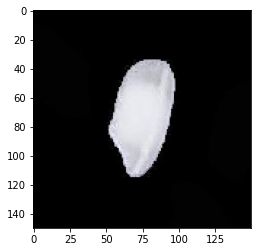

In [23]:
def predict(prediction):
  classes = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']

  img = load_img(prediction, target_size=(150,150,3))
  plt.imshow(img)

  imgRe = img_to_array(img)
  imgRe = imgRe.reshape(1,150,150,3)  
  imgRe = imgRe.astype('float32')
  imgRe /= 255

  a = int(np.argmax(model.predict(imgRe), axis=1))
  print(classes[a])

predict('/content/drive/MyDrive/predict/rice_predict/Arborio3.jpg')